In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
dados = pd.read_csv('rawdata\dados.csv')

In [3]:
dados

,Patient needed procedure,Classificator prediction
0,True,53
1,True,87
2,True,72
3,False,12
4,False,33
5,True,32
6,False,66
7,True,91
8,False,11
9,False,58


### 1°: Minimizar o Falso Positivo
#### Reduzir a quantidade de Acusar positivamente enquanto o resultado real é falso
(c1 == F and c2 > k)

### 2°: Manter a acuracia acima de 65%
#### acuracia é acertar
c1 == (c2 > k)

In [11]:
x = pd.DataFrame([{
    'i':i,
    'falso_positivo':np.mean(((dados['Classificator prediction']>=i)) & (dados['Patient needed procedure']==False)),
    "acuracia":np.mean((dados['Classificator prediction']>=i) == dados['Patient needed procedure'])
} for i in range(100)])


In [12]:
x.query('acuracia>=0.65').sort_values('falso_positivo')

,i,falso_positivo,acuracia
59,59,0.08,0.68
53,53,0.12,0.68
48,48,0.16,0.68
47,47,0.16,0.68
46,46,0.16,0.68
45,45,0.16,0.68
44,44,0.16,0.68
43,43,0.16,0.68
35,35,0.20,0.68
34,34,0.20,0.68


In [13]:
from seaborn import objects as so

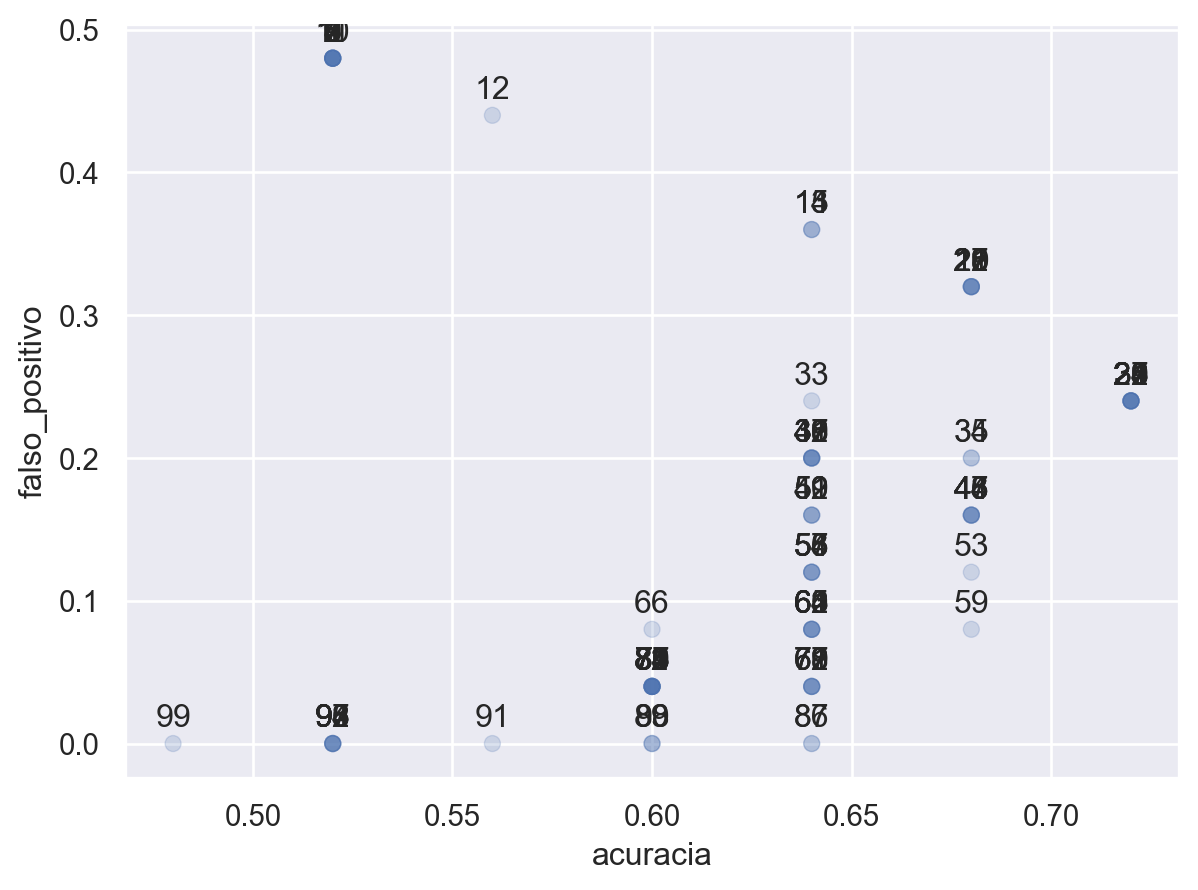

In [14]:
(
    so.Plot(x, y="falso_positivo", x="acuracia", text="i")
    .add(so.Dot(alpha=0.2))
    .add(so.Text(valign="bottom"))
)


In [38]:
mylist = ['a','b','c','d','e']
for i in range(len(mylist)):
    print(i, mylist[i]+' letra')

for index, item in enumerate(mylist):
    print(index, item+' lista')

0 a letra
1 b letra
2 c letra
3 d letra
4 e letra
0 a lista
1 b lista
2 c lista
3 d lista
4 e lista


In [132]:
import pandas as pd
import numpy as np

def avg_percentage(game_id, ft_number, team, result):
    """
    :param game_id: (list) The ID of the game. 
    :param ft_number: (list) The number of the free throw.
    :param team: (list) Which team took the free throw.
    :param result: (list) The result of the free throw, which is either missed or made.
    :returns: (float) The mean value of the percentages (0.0-100.0) of free throws that
               each team scored in each game.
    """
    df = pd.DataFrame({'game_id':game_id,'ft_number':ft_number, 'team':team, 'result':result})
    df['resultado'] = df['result'].map({'made':1,'missed':0})
    aux = df.groupby(['game_id','team']).agg({'resultado':'mean'})
    saida = np.round(aux['resultado'].mean()*100,2)
    return saida

#For example, with the parameters below, the function should return 58.33
print(avg_percentage(
    [1, 1, 1, 1, 2, 2],
    [1, 2, 3, 4, 1, 2],
    ['home','home','away','home','away','home'],
    ['made','missed','made','missed','missed','made']
))

58.33


1% das pessoas que fizeram o teste, trapacearam
20% das pessoas que fizeram o teste, fizeram o teste em menos de 20% do tempo disponível
80% das que que trapacearam fizeram o teste em menos de 20% do tempo disponível

Qual a probabilidade de dado uma pessoa fez o teste em menos de 20% do tempo disponível ter trapaceado.